# Task 1 - Distribution of genes among the different clusters - 5_branched_mesenchymal
This notebook analyses the distribution of individual genes among the different clusters.

This notebook is based on the single-cell tutorial (https://github.com/theislab/single-cell-tutorial). For further explanations of the applied methods please refer to above source.

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import os
from os import listdir
from os.path import isfile, join
import logging

In [2]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

### Load adata

In [3]:
adata = sc.read_h5ad('../data/adata/rev_processed_adata5.h5ad')
adata.obs

sample_id sample_nr  donor  \
AAACCCAAGACTAAGT-1-1-0-0  5_branched_mesenchymal         0  mouse   
AAACCCACAAGTGTCT-1-1-0-0  5_branched_mesenchymal         0  mouse   
AAACCCACATCTCATT-1-1-0-0  5_branched_mesenchymal         0  mouse   
AAACCCAGTCCTGGGT-1-1-0-0  5_branched_mesenchymal         0  mouse   
AAACCCAGTGGTCTCG-1-1-0-0  5_branched_mesenchymal         0  mouse   
...                                          ...       ...    ...   
TTTGGAGGTTCGGTCG-1-1-0-0  5_branched_mesenchymal         0  mouse   
TTTGGTTTCTAATTCC-1-1-0-0  5_branched_mesenchymal         0  mouse   
TTTGTTGAGAGGCCAT-1-1-0-0  5_branched_mesenchymal         0  mouse   
TTTGTTGGTTGGCCTG-1-1-0-0  5_branched_mesenchymal         0  mouse   
TTTGTTGTCTCTCGCA-1-1-0-0  5_branched_mesenchymal         0  mouse   

                          n_genes_by_counts  log1p_n_genes_by_counts  \
AAACCCAAGACTAAGT-1-1-0-0               8393                 9.035272   
AAACCCACAAGTGTCT-1-1-0-0               9064                 9.112176   
AAACCCACATCTCATT-1-1-0-0               9019                 9.107200   
AAACCCAGTCCTGGGT-1-1-0-0               8128                 9.003193   
AAACCCAGTGGTCTCG-1-1-0-0               9416                 9.150272   
...                                     ...                      ...   
TTTGGAGGTTCGGTCG-1-1-0-0               6759                 8.818778   
TTTGGTTTCTAATTCC-1-1-0-0               8132                 9.003685   
TTTGTTGAGAGGCCAT-1-1-0-0               8794                 9.081939   
TTTGTTGGTTGGCCTG-1-1-0-0               8899                 9.093807   
TTTGTTGTCTCTCGCA-1-1-0-0               9067                 9.112507   

                          total_counts  log1p_total_counts  \
AAACCCAAGACTAAGT-1-1-0-0       77444.0           11.257323   
AAACCCACAAGTGTCT-1-1-0-0      126036.0           11.744330   
AAACCCACATCTCATT-1-1-0-0       98624.0           11.499080   
AAACCCAGTCCTGGGT-1-1-0-0       68412.0           11.133318   
AAACCCAGTGGTCTCG-1-1-0-0      129983.0           11.775167   
...                                ...                 ...   
TTTGGAGGTTCGGTCG-1-1-0-0       39581.0           10.586130   
TTTGGTTTCTAATTCC-1-1-0-0       94466.0           11.456006   
TTTGTTGAGAGGCCAT-1-1-0-0       91653.0           11.425776   
TTTGTTGGTTGGCCTG-1-1-0-0      110425.0           11.612101   
TTTGTTGTCTCTCGCA-1-1-0-0      133214.0           11.799720   

                          pct_counts_in_top_50_genes  \
AAACCCAAGACTAAGT-1-1-0-0                   20.709158   
AAACCCACAAGTGTCT-1-1-0-0                   19.330985   
AAACCCACATCTCATT-1-1-0-0                   18.359628   
AAACCCAGTCCTGGGT-1-1-0-0                   23.468105   
AAACCCAGTGGTCTCG-1-1-0-0                   21.972104   
...                                              ...   
TTTGGAGGTTCGGTCG-1-1-0-0                   23.741189   
TTTGGTTTCTAATTCC-1-1-0-0                   21.224568   
TTTGTTGAGAGGCCAT-1-1-0-0                   22.625555   
TTTGTTGGTTGGCCTG-1-1-0-0                   24.344125   
TTTGTTGTCTCTCGCA-1-1-0-0                   17.939556   

                          pct_counts_in_top_100_genes  \
AAACCCAAGACTAAGT-1-1-0-0                    27.449512   
AAACCCACAAGTGTCT-1-1-0-0                    26.772509   
AAACCCACATCTCATT-1-1-0-0                    24.165518   
AAACCCAGTCCTGGGT-1-1-0-0                    31.652342   
AAACCCAGTGGTCTCG-1-1-0-0                    28.000585   
...                                               ...   
TTTGGAGGTTCGGTCG-1-1-0-0                    30.795078   
TTTGGTTTCTAATTCC-1-1-0-0                    28.529841   
TTTGTTGAGAGGCCAT-1-1-0-0                    29.861543   
TTTGTTGGTTGGCCTG-1-1-0-0                    30.827258   
TTTGTTGTCTCTCGCA-1-1-0-0                    24.278229   

                          pct_counts_in_top_200_genes  \
AAACCCAAGACTAAGT-1-1-0-0                    35.794897   
AAACCCACAAGTGTCT-1-1-0-0                    35.806436   
AAACCCACATCTCATT-1-1-0-0                    31.844176   
AAACCCAGTCCTGG

In [4]:
adata.var

feature_types     mt gene_symbols-0-0-0-0-0-0  \
ENSMUSG00000051285  Gene Expression  False                   Pcmtd1   
ENSMUSG00000039748  Gene Expression  False                     Exo1   
ENSMUSG00000057363  Gene Expression  False                     Uxs1   
ENSMUSG00000038702  Gene Expression  False                     Dsel   
ENSMUSG00000033021  Gene Expression  False                    Gmppa   
...                             ...    ...                      ...   
ENSMUSG00000064367  Gene Expression  False                   mt-Nd5   
ENSMUSG00000064368  Gene Expression  False                   mt-Nd6   
ENSMUSG00000064370  Gene Expression  False                  mt-Cytb   
ENSMUSG00000095041  Gene Expression  False       ENSMUSG00000095041   
ENSMUSG00000095742  Gene Expression  False       ENSMUSG00000095742   

                    n_cells_by_counts-0-0-0-0-0-0  mean_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                           4892                 2.636992   
ENSMUSG00000039748                            106                 0.029674   
ENSMUSG00000057363                           3639                 1.102132   
ENSMUSG00000038702                           1867                 0.416307   
ENSMUSG00000033021                           2448                 0.506338   
...                                           ...                      ...   
ENSMUSG00000064367                           6188                44.415154   
ENSMUSG00000064368                           5237                 4.979113   
ENSMUSG00000064370                           6703               183.073898   
ENSMUSG00000095041                           5425                 7.305099   
ENSMUSG00000095742                            638                 0.099395   

                    log1p_mean_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                       1.291157   
ENSMUSG00000039748                       0.029243   
ENSMUSG00000057363                       0.742952   
ENSMUSG00000038702                       0.348052   
ENSMUSG00000033021                       0.409682   
...                                           ...   
ENSMUSG00000064367                       3.815846   
ENSMUSG00000064368                       1.788272   
ENSMUSG00000064370                       5.215337   
ENSMUSG00000095041                       2.116870   
ENSMUSG00000095742                       0.094760   

                    pct_dropout_by_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                          29.530395   
ENSMUSG00000039748                          98.473063   
ENSMUSG00000057363                          47.579948   
ENSMUSG00000038702                          73.105733   
ENSMUSG00000033021                          64.736387   
...                                               ...   
ENSMUSG00000064367                          10.861423   
ENSMUSG00000064368                          24.560645   
ENSMUSG00000064370                           3.442812   
ENSMUSG00000095041                          21.852492   
ENSMUSG00000095742                          90.809565   

                    total_counts-0-0-0-0-0-0  log1p_total_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                   18306.0                        9.815039   
ENSMUSG00000039748                     206.0                        5.332719   
ENSMUSG00000057363                    7651.0                        8.942722   
ENSMUSG00000038702                    2890.0                        7.969358   
ENSMUSG00000033021                    3515.0                        8.165079   
...                                      ...                             ...   
ENSMUSG00000064367                  308330.0                       12.638929   
ENSMUSG00000064368                   34565.0                       10.450625   
ENSMUSG00000064370                 1270899.0                       14.055236   
ENSMUSG00000095041                   50712.0                       10.833938   
ENSMUSG00000095742            

<a id="Clustering"></a>

## Clustering

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 3 clusters and added
    'louvain_r0.3', the cluster labels (adata.obs, categorical) (0:00:00)


/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


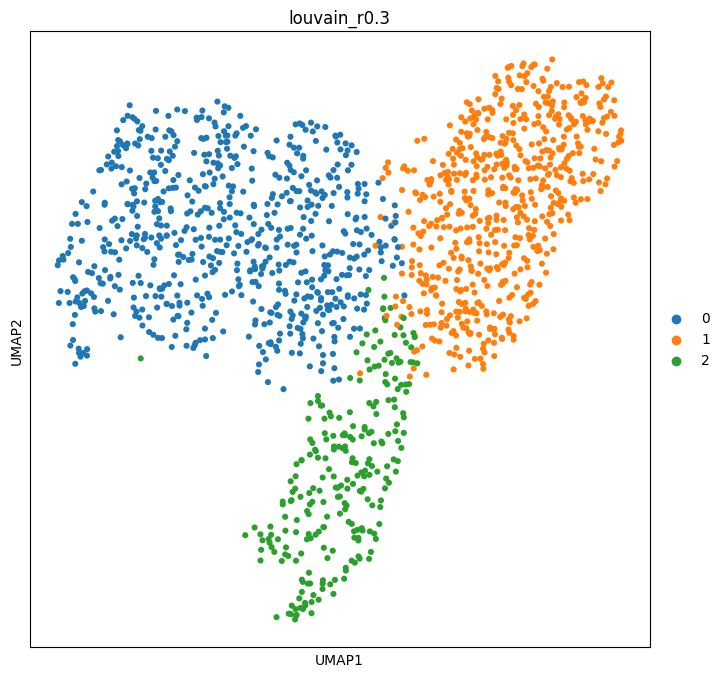

In [8]:
# Perform clustering - using highly variable genes
# sc.tl.louvain(adata, key_added='louvain_r1')

sc.tl.louvain(adata, resolution=0.3, key_added='louvain_r0.3', random_state=10)
sc.pl.umap(adata, color=['louvain_r0.3'])

/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


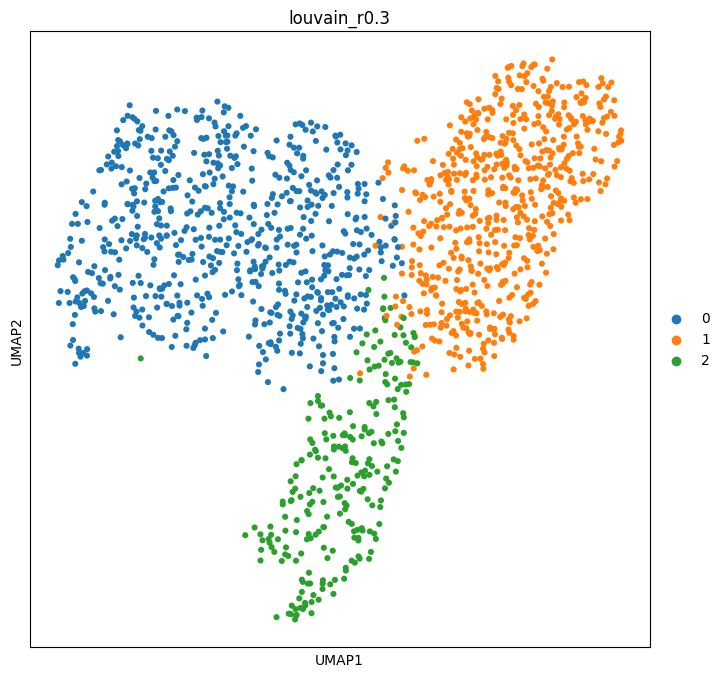

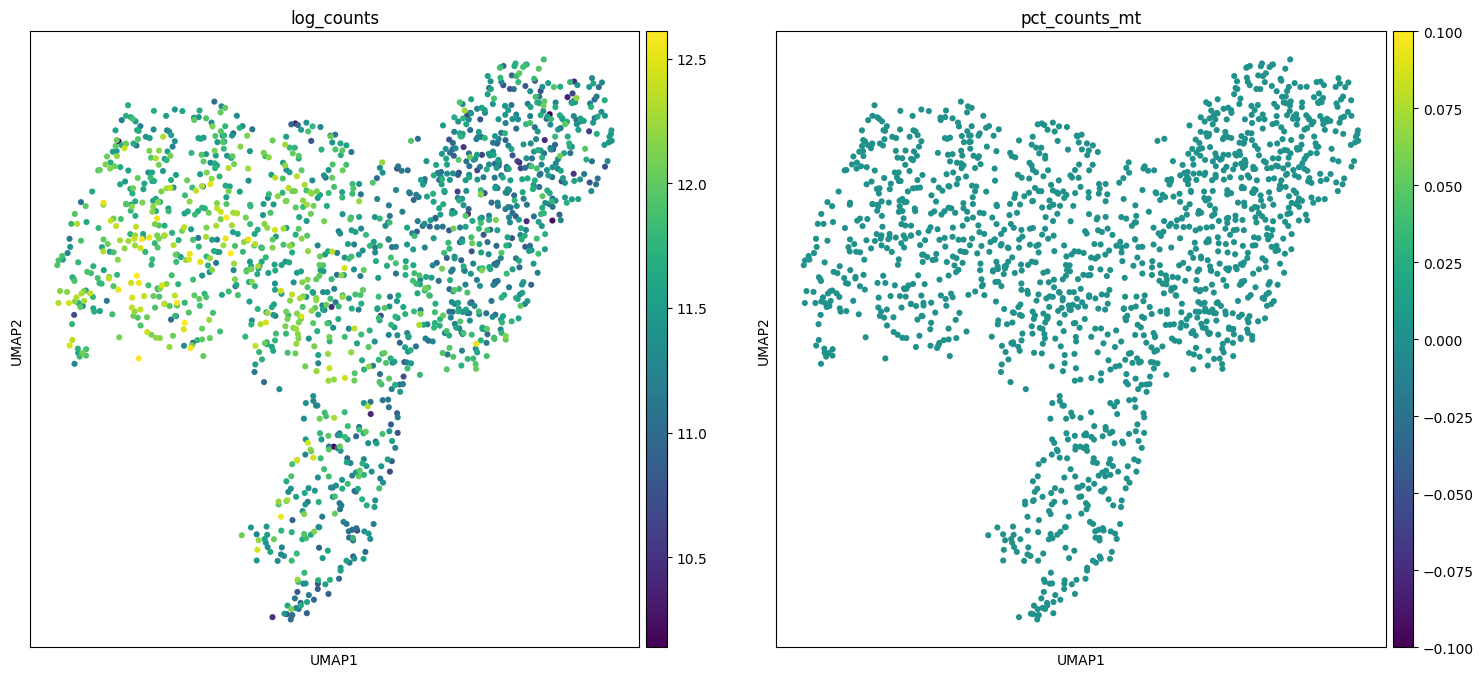

In [9]:
# Analysis sees 3 classes here
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['louvain_r0.3'])

sc.pl.umap(adata, color=['log_counts', 'pct_counts_mt'])

/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


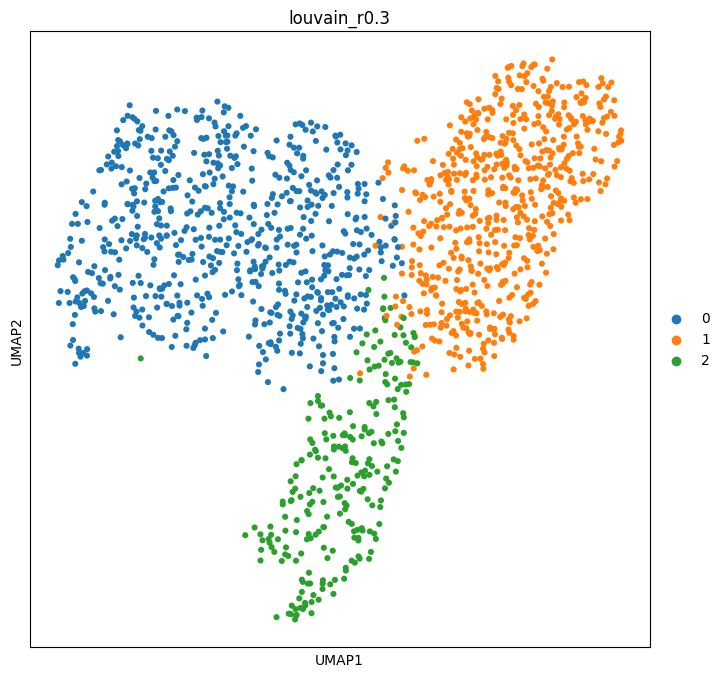

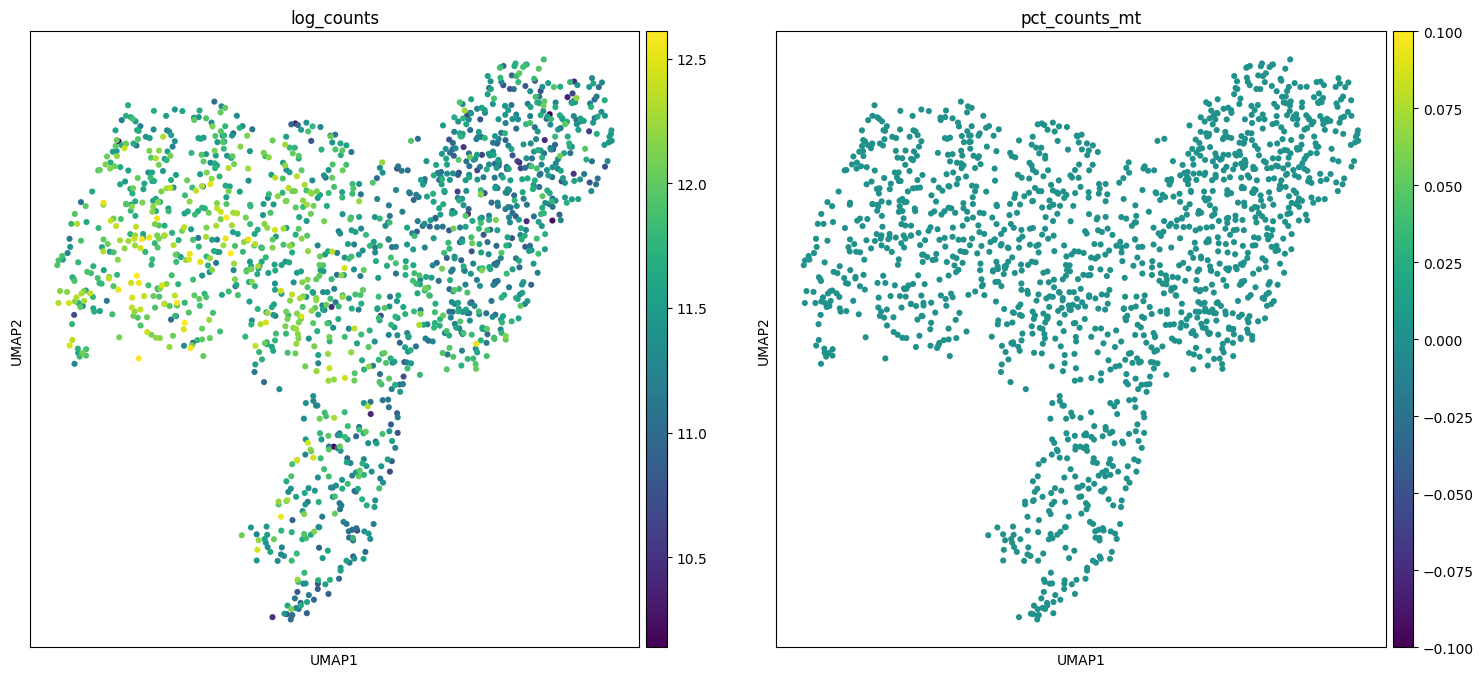

In [10]:
# Analysis sees 3 classes here
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['louvain_r0.3'], save='umap_5_branched_mesenchymal.pdf')
# os.rename("figures/umap5_branched_mesenchymal.pdf", 
#           "../rev_results/task1/5_branched_mesenchymal/UMAP.pdf")

sc.pl.umap(adata, color=['log_counts', 'pct_counts_mt'], save='umap_counts_5_branched_mesenchymal.pdf')
# os.rename("figures/umap/5_branched_mesenchymal/UMAP_counts.pdf", 
#           "../rev_results/task1/5_branched_mesenchymal/UMAP_counts.pdf")

<a id="Markers"></a>

## Marker genes & cluster annotation

In [11]:
# Create a new AnnData object with gene symbols as var indices
adata_tmp = sc.AnnData(
    X=adata.X,  # Assuming you want to keep the same expression data
    obs=adata.obs.copy(),  # Copy the obs information from the original AnnData
)

# Set the gene symbols as var indices
adata_tmp.var.index = adata.var['gene_symbols-0-0-0-0-0-0']

In [12]:
# Perform gene ranking on the modified AnnData object
sc.tl.rank_genes_groups(adata_tmp, groupby='louvain_r0.3', key_added='rank_genes_r0.3')



ranking genes
    finished: added to `.uns['rank_genes_r0.3']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


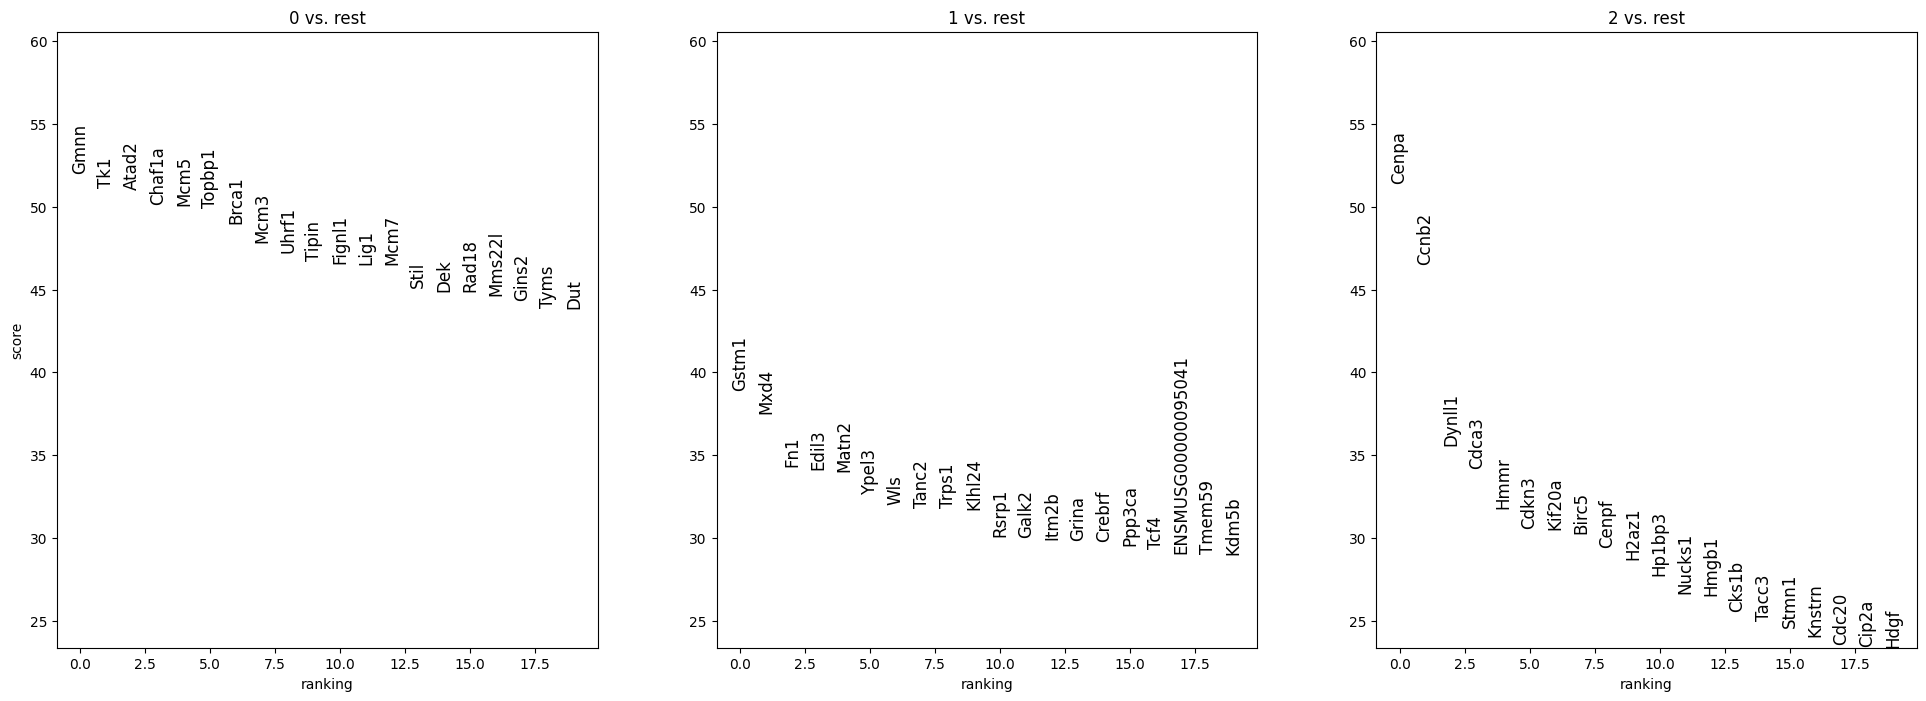

In [13]:
# Visualize the results using gene symbols
sc.pl.rank_genes_groups(adata_tmp, key='rank_genes_r0.3', groups=['0', '1', '2'], fontsize=12)

In [14]:
# Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

Below we plot genes of particular interest within the clusters

### Cluster 0

Encrypted symbol for  Gstm1 is  ENSMUSG00000058135


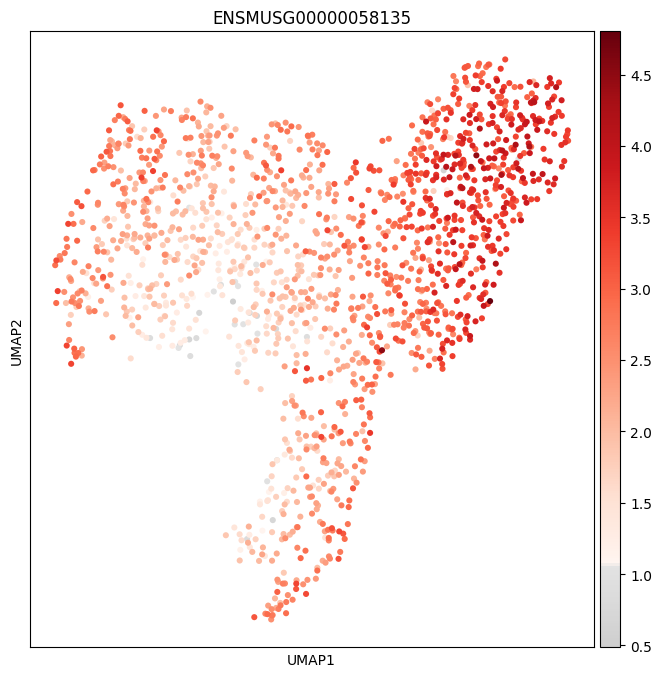

Encrypted symbol for  Tk1 is  ENSMUSG00000025574


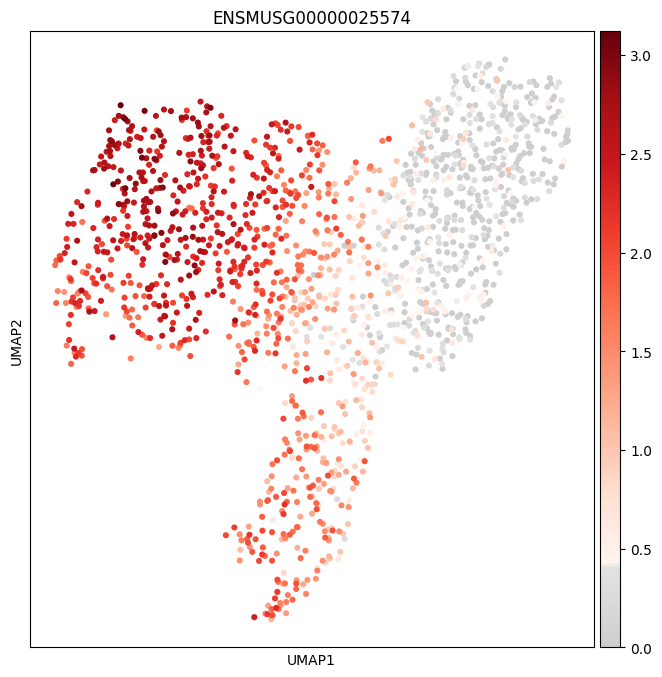

Encrypted symbol for  Atad2 is  ENSMUSG00000022360


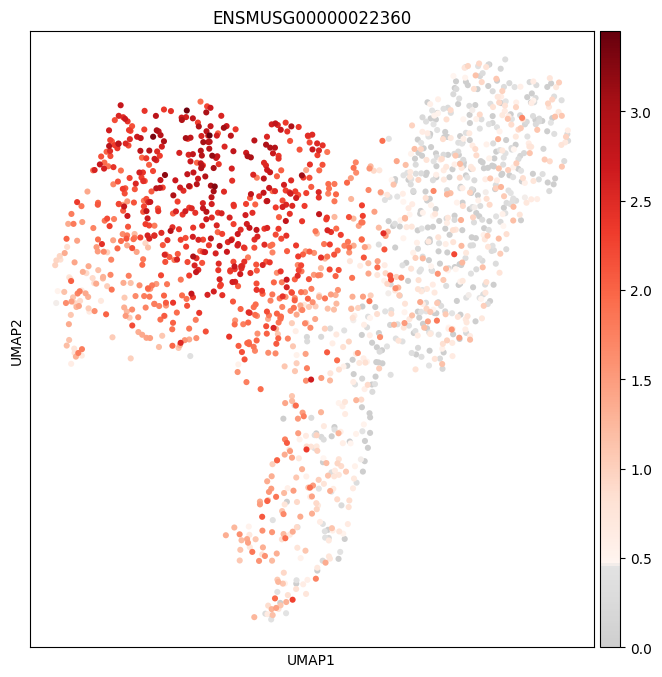

Encrypted symbol for  Chaf1a is  ENSMUSG00000002835


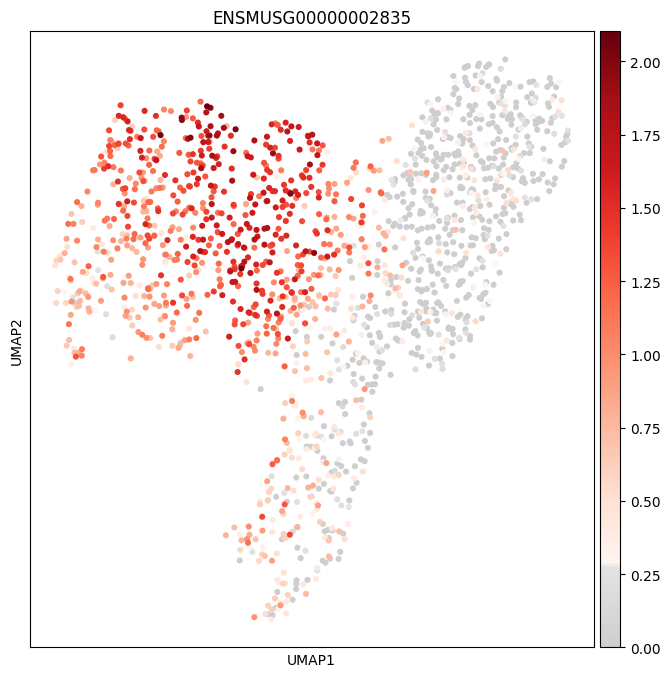

Encrypted symbol for  Mcm5 is  ENSMUSG00000005410


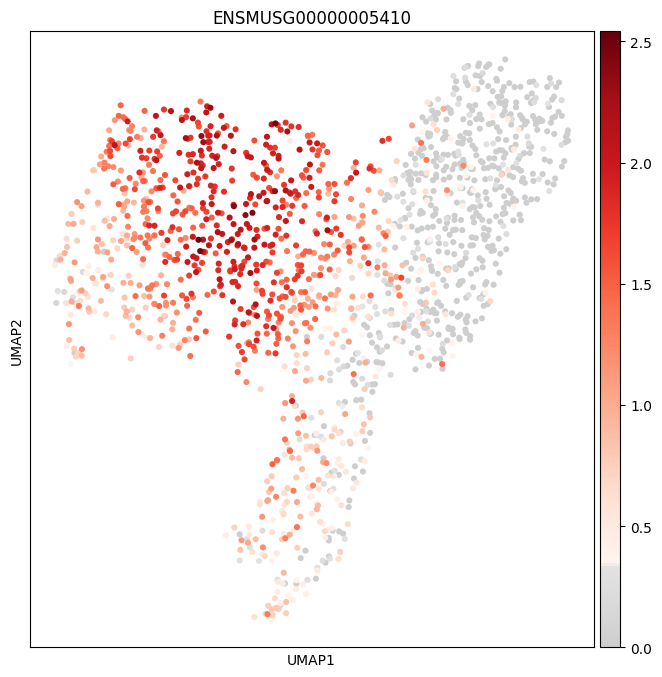

Encrypted symbol for  Topbp1 is  ENSMUSG00000032555


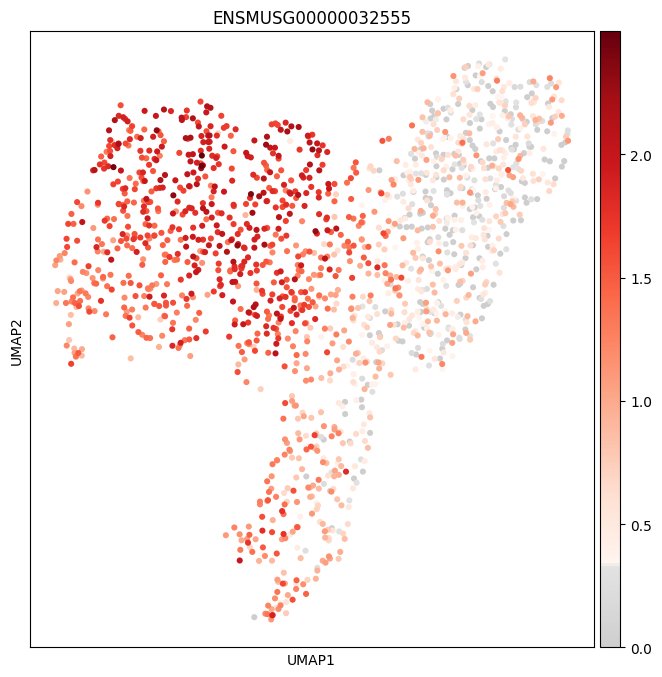

In [19]:
gene_symbols = ['Gstm1', 'Tk1', 'Atad2', 'Chaf1a', 'Mcm5', 'Topbp1']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/5_branched_mesenchymal_Cluster0_' + gene_symbol + '.pdf')


## Cluster 1

Encrypted symbol for  Gstm1 is  ENSMUSG00000058135


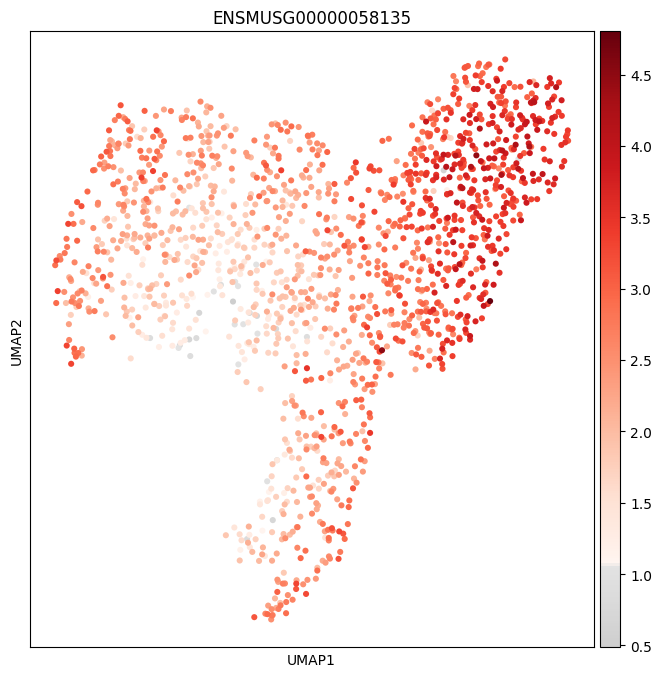

Encrypted symbol for  Mxd4 is  ENSMUSG00000037235


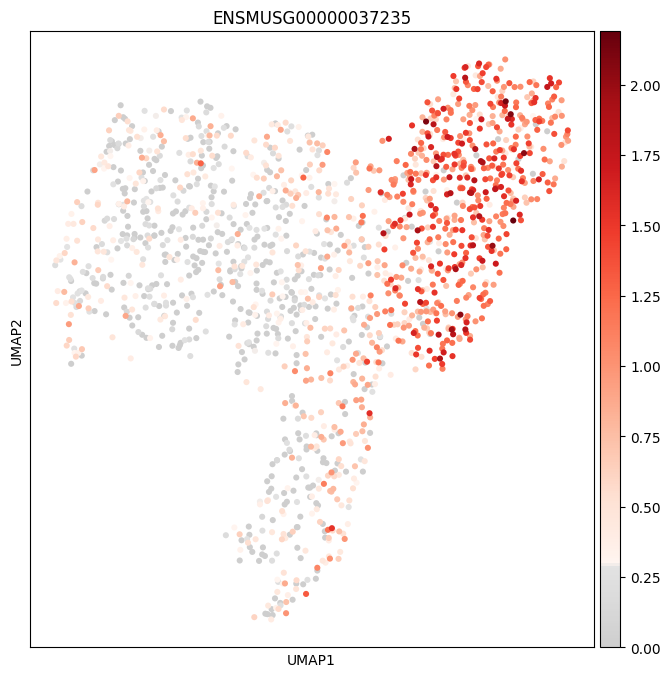

Encrypted symbol for  Fn1 is  ENSMUSG00000026193


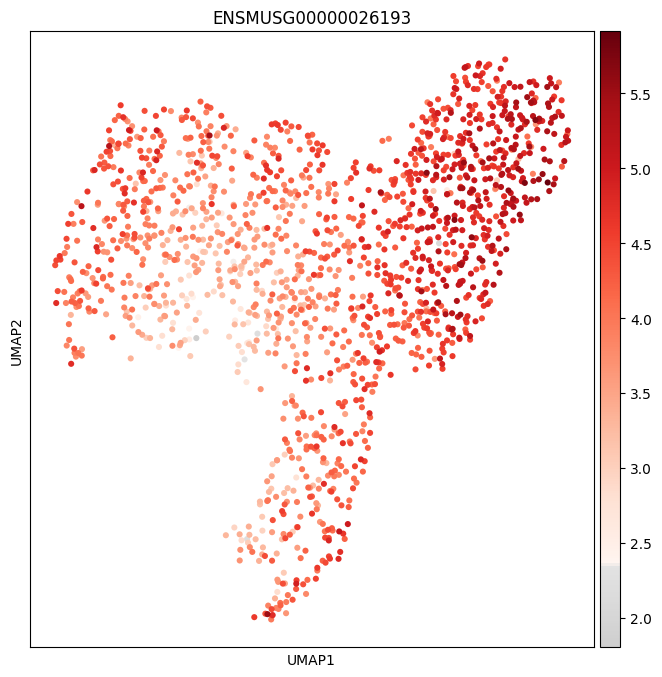

Encrypted symbol for  Edil3 is  ENSMUSG00000034488


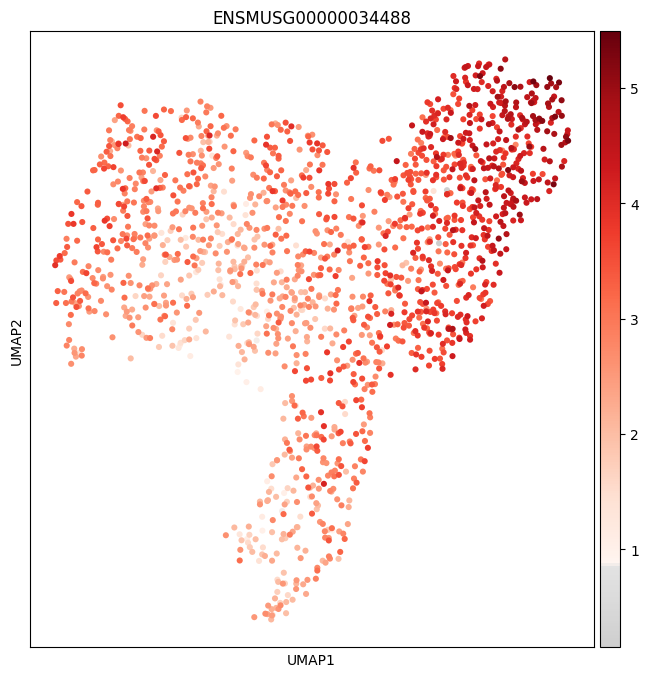

Encrypted symbol for  Matn2 is  ENSMUSG00000022324


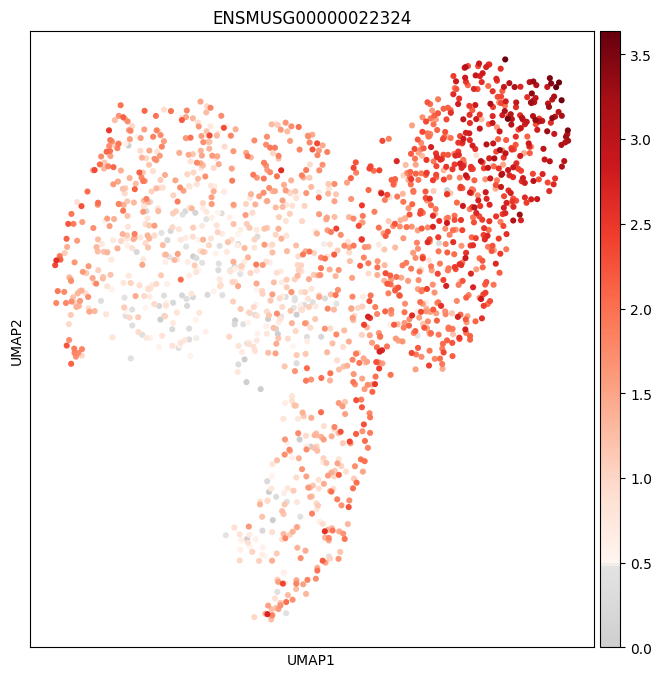

In [16]:
gene_symbols = ['Gstm1', 'Mxd4', 'Fn1', 'Edil3', 'Matn2']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/5_branched_mesenchymal_Cluster1_' + gene_symbol + '.pdf')


## Cluster 2

Encrypted symbol for  Cenpa is  ENSMUSG00000029177


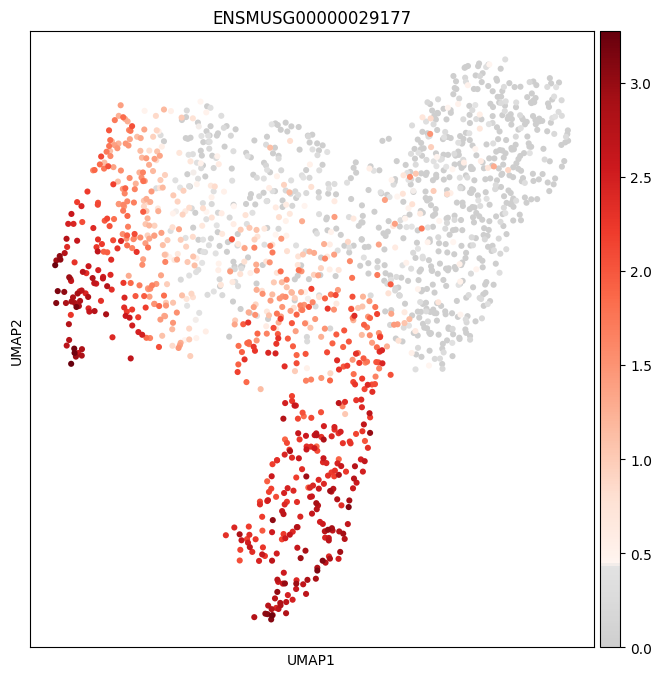

Encrypted symbol for  Ccnb2 is  ENSMUSG00000032218


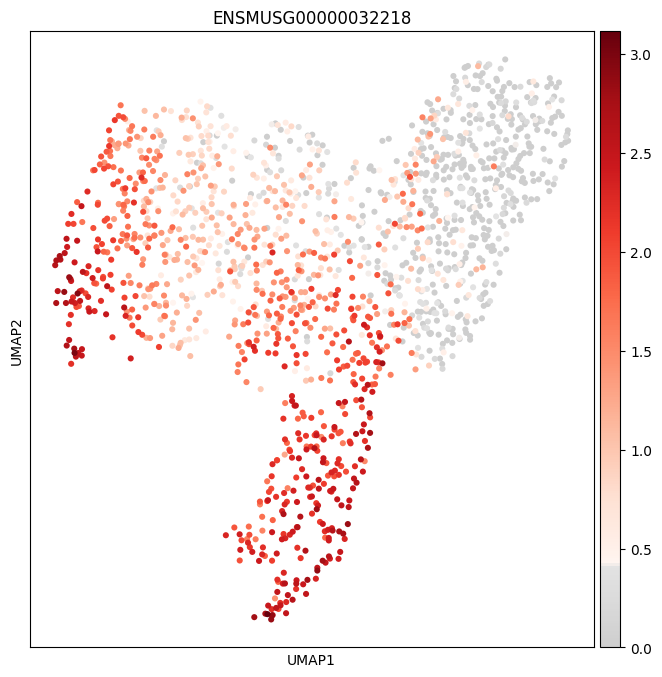

Encrypted symbol for  Dynll1 is  ENSMUSG00000009013


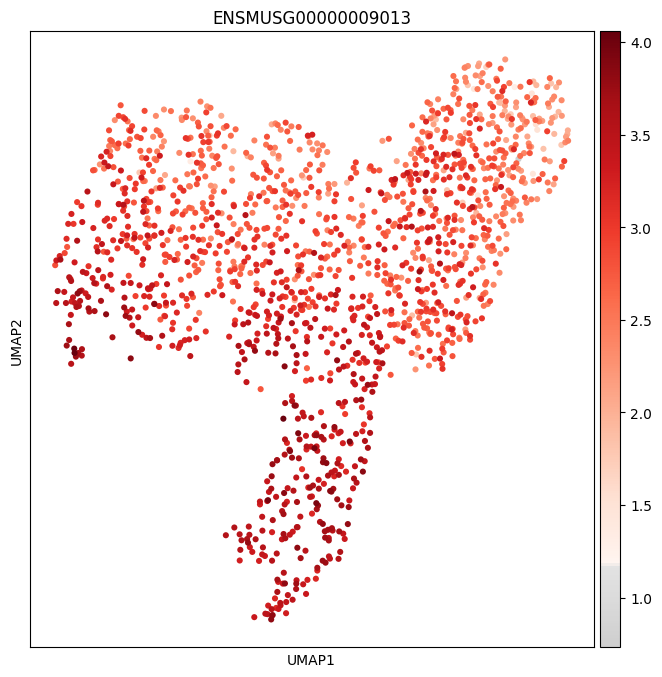

Encrypted symbol for  Cdca3 is  ENSMUSG00000023505


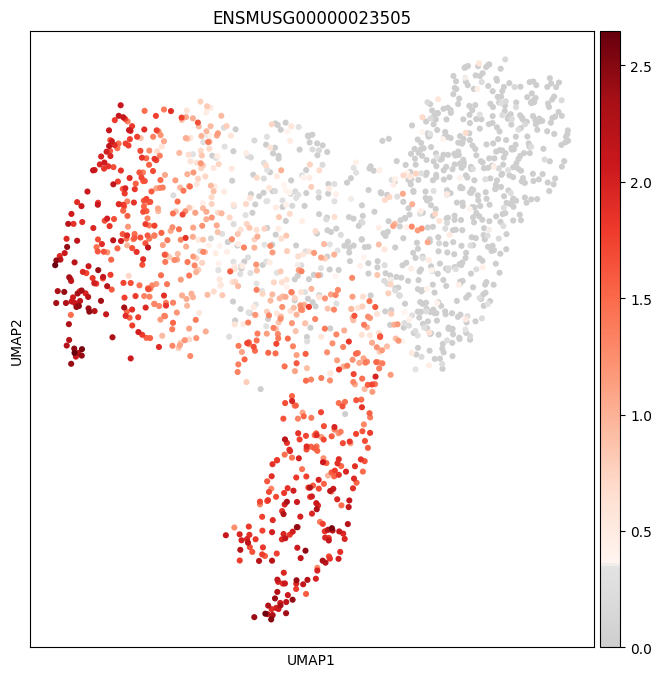

In [17]:
gene_symbols = ['Cenpa', 'Ccnb2', 'Dynll1', 'Cdca3']
for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/5_branched_mesenchymal_Cluster2_' + gene_symbol + '.pdf')
